In [ ]:
# *************************** RECURRENT AUTOENCODER *********************************** #

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras as K

In [2]:
# load data set
(X_train_full, y_train_full), (X_test, y_test) = K.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [13]:
class Recurrent:
    def __init__(self, input_space=[28, 28], 
                 latent_space_structure=[28, 100, 30, 100, 28]):
        
        assert instanceof(input_space, list)

        self.encoder = K.models.Sequential([
            K.layers.LSTM(units=100, return_sequences=True, input_shape=[28, 28]),
            K.layers.LSTM(units=30)
        ])
        
        self.decoder = K.models.Sequential([
            K.layers.RepeatVector(28, input_shape=[30]),
            K.layers.LSTM(units=100, return_sequences=True),
            
            K.layers.TimeDistributed(K.layers.Dense(28, activation='sigmoid'))
            
        ])
        
        self.model = K.models.Sequential([self.encoder, self.decoder])
        
    def train(self, X_train, X_test, epochs=10, batch_size=32):
        
        self.model.compile(loss='binary_crossentropy', 
                           optimizer='adam', metrics=['accuracy'])
        
        self.h = self.model.fit(X_train, X_train, 
                       epochs=epochs, 
                       batch_size=batch_size,
                       validation_data=(X_test, X_test))
        
    # Plot Accuracy & Loss curves
    def plot(self):
        fig = plt.figure(figsize=(15, 6))
        
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.set_title("Accuracy")
        ax1.set_xlabel("Number of epochs")
        ax1.plot(self.h.history['accuracy'], color='blue')
        
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.set_title("Loss")
        ax2.set_xlabel("Number of epochs")
        ax2.plot(self.h.history['loss'], color='red')
        
        plt.grid(True)
        plt.show()
        
    def plot_image(self, img):
        plt.imshow(image, cmap="binary")
        plt.axis("off")
        
    def show_reconstructions(self, images=X_valid, n_images=5):
        reconstructions = self.model.predict(images[:n_images])
        fig = plt.figure(figsize=(n_images * 1.5, 3))
        for image_index in range(n_images):
            plt.subplot(2, n_images, 1 + image_index)
            plot_image(images[image_index])
            plt.subplot(2, n_images, 1 + n_images + image_index)
            plot_image(reconstructions[image_index])   
        
        

In [14]:
model = Recurrent()

NameError: name 'instanceof' is not defined

In [10]:
model.train(X_train, X_test, epochs=5, batch_size=512)

Epoch 1/5
108/108 [==============================] - 52s 481ms/step - loss: 0.3490 - accuracy: 0.0612 - val_loss: 0.2956 - val_accuracy: 0.0725
Epoch 2/5
108/108 [==============================] - 50s 465ms/step - loss: 0.2881 - accuracy: 0.0696 - val_loss: 0.2766 - val_accuracy: 0.0679
Epoch 3/5
108/108 [==============================] - 56s 518ms/step - loss: 0.2711 - accuracy: 0.0713 - val_loss: 0.2678 - val_accuracy: 0.0674
Epoch 4/5
108/108 [==============================] - 59s 543ms/step - loss: 0.2660 - accuracy: 0.0661 - val_loss: 0.2596 - val_accuracy: 0.0653
Epoch 5/5
108/108 [==============================] - 45s 419ms/step - loss: 0.2545 - accuracy: 0.0691 - val_loss: 0.2499 - val_accuracy: 0.0745


NameError: name 'plot_image' is not defined

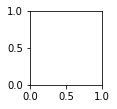

In [11]:
model.show_reconstructions()

AttributeError: 'Recurrent' object has no attribute 'h'

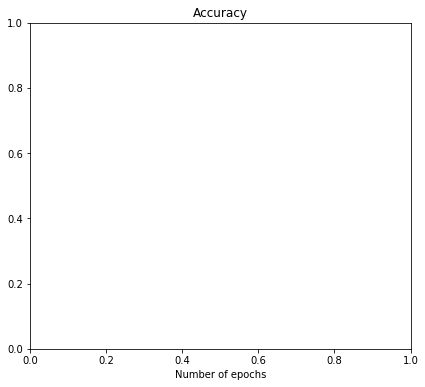

In [12]:
model.plot()